In [35]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [36]:
#import du lieu
df_san_pham = pd.read_csv('data/San_pham.csv')
df_san_pham.head()

,ma_san_pham,ten_san_pham,gia_ban,gia_goc,phan_loai,mo_ta,diem_trung_binh
0,318900012,Nước Hoa Hồng Klairs Không Mùi Cho Da Nhạy Cảm...,209000,435000.0,2x180ml\n180ml\nKhông Mùi\nCó Mùi Hương,Nước Hoa Hồng Klairs Supple Preparation là dòn...,4.8
1,205100137,"Nước Tẩy Trang L'Oreal Tươi Mát Cho Da Dầu, Hỗ...",147000,229000.0,2x400ml\n95ml\n400ml\nLàm Sạch Sâu\nTươi Mát D...,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,4.7
2,422208973,Sữa Rửa Mặt CeraVe Sạch Sâu Cho Da Thường Đến ...,343000,455000.0,88ml\n236ml\n473ml\nDa khô/Hỗn hợp khô\nDa dầu...,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,4.9
3,204900013,Kem Chống Nắng La Roche-Posay Kiểm Soát Dầu SP...,377000,560000.0,2x50ml\n50ml,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,4.6
4,253900006,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm SPF 50...,210000,445000.0,20ml\n50ml,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,4.6


In [37]:
df_khach_hang = pd.read_csv('data/Khach_hang.csv')
df_khach_hang.head()

,ma_khach_hang,ho_ten
0,1,Hoàng Anh Trần
1,2,Nguyễn Lương Nhi Phương
2,3,Nguyễn Thu Trang
3,4,ANH THƯ
4,5,DIỆU ÁNH


In [38]:
df_danh_gia = pd.read_csv('data/Preprocess_San_pham.csv')
df_danh_gia.head()

,id,ma_khach_hang,noi_dung_binh_luan,ngay_binh_luan,gio_binh_luan,so_sao,ma_san_pham,label
0,1,443,dễ_dàng thoải_mái thư_giãn,29/04/2023,17:06,5,308500015,good
1,2,1030,dãng thoải_mái thư_giãn,30/04/2023,15:04,5,308500015,good
2,3,689,thích hasaki tẩy,30/04/2023,18:34,5,422216594,good
3,4,2519,khả_năng sạch tốt lớp mắt môi_chóng loại_bỏ bô...,17/07/2022,13:48,5,204100075,good
4,5,402,sữa rửa mặt tốt sạch mụn mịn,15/04/2023,23:04,5,422208977,good


###**Some quick observe**

In [39]:
# Merge df_danh_gia với df_san_pham để lấy tên sản phẩm
df_danh_gia_2 = df_danh_gia.merge(df_san_pham[['ma_san_pham', 'ten_san_pham']], on='ma_san_pham', how='left')


# Nếu có bảng khách hàng (ví dụ df_khach_hang)
# df_khach_hang = pd.DataFrame({'ma_khach_hang': [...], 'ten_khach_hang': [...]}) # Giả sử bảng khách hàng
# df_danh_gia = df_danh_gia.merge(df_khach_hang, on='ma_khach_hang', how='left')

# Nếu bạn không có bảng khách hàng, bỏ qua phần này và tiếp tục.

# Số lượng sản phẩm mà mỗi khách hàng đã mua (có tên khách hàng)
customer_product_counts = (
    df_danh_gia_2.groupby(['ma_khach_hang', 'ten_san_pham'])
    .size()
    .reset_index(name='so_luong_mua')
    .sort_values(by='so_luong_mua', ascending=False)
)
print("Số lượng sản phẩm mà mỗi khách hàng đã mua (giảm dần):")
print(customer_product_counts)

# Số lần mỗi sản phẩm được mua (có tên sản phẩm)
product_purchase_counts = (
    df_danh_gia_2.groupby(['ma_san_pham', 'ten_san_pham'])
    .size()
    .reset_index(name='so_lan_mua')
    .sort_values(by='so_lan_mua', ascending=False)
)
print("\nSố lần mỗi sản phẩm được mua (giảm dần):")
print(product_purchase_counts)


Số lượng sản phẩm mà mỗi khách hàng đã mua (giảm dần):
       ma_khach_hang                                       ten_san_pham  \
800              121  Combo 2 Nước Tẩy Trang L'Oreal Tươi Mát Cho Da...   
6663             792  Hộp 10 Miếng Mặt Nạ Naruko Ý Dĩ Nhân Đỏ Se Lỗ ...   
6664             792  Hộp 10 Miếng Mặt Nạ Naruko Ý Dĩ Nhân Đỏ Sáng D...   
6665             792  Hộp 8 Miếng Mặt Nạ Naruko Tràm Trà Kiềm Dầu Gi...   
6672             792  Mặt Nạ Naruko Bạch Ngọc Lan Dưỡng Sáng, Săn Ch...   
...              ...                                                ...   
6879             810  Nước Tẩy Trang Bioderma Dành Cho Da Dầu & Hỗn ...   
6878             810  Combo 2 Nước Tẩy Trang Bioderma Dành Cho Da Dầ...   
6877             809  Nước Tẩy Trang Bioderma Dành Cho Da Nhạy Cảm 5...   
6876             809  Nước Tẩy Trang Bioderma Dành Cho Da Nhạy Cảm 2...   
20340           4735              Combo 3 Bông Tẩy Trang Ipek 150 Miếng   

       so_luong_mua  
800               3  


In [48]:
import pandas as pd

def process_customer_and_product_data(df_danh_gia, df_san_pham, df_khach_hang=None):
    """
    Hàm xử lý dữ liệu để lấy thông tin sản phẩm, khách hàng và số lượng mua bán.
    
    Args:
        df_danh_gia (pd.DataFrame): Bảng đánh giá chứa 'ma_san_pham', 'ma_khach_hang', ...
        df_san_pham (pd.DataFrame): Bảng sản phẩm chứa 'ma_san_pham', 'ten_san_pham'.
        df_khach_hang (pd.DataFrame, optional): Bảng khách hàng chứa 'ma_khach_hang', 'ten_khach_hang'. Defaults to None.
    
    Returns:
        pd.DataFrame, pd.DataFrame: 
            - Số lượng sản phẩm mà mỗi khách hàng đã mua (giảm dần)
            - Số lần mỗi sản phẩm được mua (giảm dần)
    """
    # Kết hợp với bảng sản phẩm để lấy tên sản phẩm
    df_danh_gia_2 = df_danh_gia.merge(df_san_pham[['ma_san_pham', 'ten_san_pham']], on='ma_san_pham', how='left')
    
    # Nếu có bảng khách hàng, kết hợp thêm để lấy tên khách hàng
    if df_khach_hang is not None:
        df_danh_gia_2 = df_danh_gia_2.merge(df_khach_hang, on='ma_khach_hang', how='left')
    
    # Số lượng sản phẩm mà mỗi khách hàng đã mua (có tên khách hàng)
    customer_product_counts = (
        df_danh_gia_2.groupby(['ma_khach_hang', 'ten_san_pham'])
        .size()
        .reset_index(name='so_luong_mua')
        .sort_values(by='so_luong_mua', ascending=False)
    )
    
    # Số lần mỗi sản phẩm được mua (có tên sản phẩm)
    product_purchase_counts = (
        df_danh_gia_2.groupby(['ma_san_pham', 'ten_san_pham'])
        .size()
        .reset_index(name='so_lan_mua')
        .sort_values(by='so_lan_mua', ascending=False)
    )
    
    return customer_product_counts, product_purchase_counts

# Sử dụng hàm
# customer_product_counts, product_purchase_counts = process_customer_and_product_data(df_danh_gia, df_san_pham, df_khach_hang)


customer_product_counts, product_purchase_counts = process_customer_and_product_data(df_danh_gia, df_san_pham, df_khach_hang)


In [49]:
customer_product_counts

,ma_khach_hang,ten_san_pham,so_luong_mua
757,121,Nước Tẩy Trang L'Oreal Căng Mịn Da 400ml,3
3342,365,[Mini] Nước Tẩy Trang L'Oreal Làm Sạch Sâu Cho...,3
3337,365,Nước Tẩy Trang L'Oreal Căng Mịn Da 400ml,3
3338,365,"Nước Tẩy Trang L'Oreal Dưỡng Ẩm Cho Da Thường,...",3
3339,365,Nước Tẩy Trang L'Oreal Làm Sạch Sâu Cho Da Dầu...,3
...,...,...,...
6524,833,Kem Chống Nắng L'Oreal Paris X20 Thoáng Da Mỏn...,1
6523,833,Kem Chống Nắng L'Oreal Mịn Nhẹ Nâng Tông Giảm ...,1
6522,833,Kem Chống Nắng L'Oreal Mịn Nhẹ Kiềm Dầu Thoáng...,1
6521,833,Combo 3 Hộp Bông Tẩy Trang Silcot Cơ Bản 82 Miếng,1


In [50]:
product_purchase_counts

,ma_san_pham,ten_san_pham,so_lan_mua
376,422204259,Nước Tẩy Trang L'Oreal Làm Sạch Sâu Cho Da Dầu...,266
89,205100137,"Nước Tẩy Trang L'Oreal Tươi Mát Cho Da Dầu, Hỗ...",258
90,205100146,Nước Tẩy Trang L'Oreal Làm Sạch Sâu Trang Điểm...,256
570,422211446,Combo 2 Nước Tẩy Trang L'Oreal Tươi Mát Cho Da...,256
571,422211447,Combo 2 Nước Tẩy Trang L'Oreal Căng Mịn Da 400ml,256
...,...,...,...
613,422215608,Kem Dưỡng Curél Cấp Ẩm Sáng Mịn 40g,1
612,422215526,Kem Dưỡng Forencos Dầu Marula Dưỡng Sáng Da Ba...,1
611,422215267,"Kem Dưỡng Skintific 5X Ceramide Cấp Ẩm, Phục H...",1
610,422215096,Serum Bioderma Dưỡng Ẩm Và Làm Dịu Dành Cho Da...,1


In [40]:
def get_customer_purchases(df_danh_gia, df_san_pham, ma_khach_hang):
    # Filter customer data
    customer_data = df_danh_gia[df_danh_gia['ma_khach_hang'] == ma_khach_hang]

    if customer_data.empty:
        print(f"Không tìm thấy dữ liệu cho khách hàng với mã: {ma_khach_hang}")
        return None

    # Merge with product data
    customer_data = customer_data.merge(df_san_pham[['ma_san_pham', 'ten_san_pham']], on='ma_san_pham', how='left')

    # Handle missing product names
    if customer_data['ten_san_pham'].isnull().all():
        print(f"Không tìm thấy sản phẩm tương ứng cho mã khách hàng: {ma_khach_hang}")
        return None

    # Drop rows with NaN in 'ten_san_pham'
    customer_data = customer_data.dropna(subset=['ten_san_pham'])

    # Count purchases
    customer_purchases = (
        customer_data.groupby(['ma_san_pham', 'ten_san_pham'])
        .size()
        .reset_index(name='so_luong_mua')
        .sort_values(by='so_luong_mua', ascending=False)
    )

    print(f"Thông tin sản phẩm mà khách hàng {ma_khach_hang} đã mua:")
    print(customer_purchases)

    return customer_purchases


In [41]:
ma_khach_hang = 1030
customer_purchases = get_customer_purchases(df_danh_gia, df_san_pham, ma_khach_hang)


Thông tin sản phẩm mà khách hàng 1030 đã mua:
    ma_san_pham                                       ten_san_pham  \
0     204100019          Gel Rửa Mặt Eucerin Cho Da Nhờn Mụn 200ml   
1     204100054          Gel Rửa Mặt Eucerin Cho Da Nhờn Mụn 400ml   
2     308500004  Mặt Nạ Naruko Tràm Trà Kiểm Soát Dầu Và Giảm M...   
3     308500009  Mặt Nạ Naruko Ý Dĩ Nhân Đỏ Se Lỗ Chân Lông, Sá...   
4     308500013  Mặt Nạ Naruko Hoa Hồng Nhung Cấp Nước Cho Da 25ml   
5     308500015  Mặt Nạ Naruko Bạch Ngọc Lan Dưỡng Sáng, Săn Ch...   
6     308500018  Mặt Nạ Naruko Hoa Thủy Tiên Hỗ Trợ Phục Hồi Da...   
7     308500037  Hộp 8 Miếng Mặt Nạ Naruko Tràm Trà Kiềm Dầu Gi...   
8     422200236  Kem Chống Nắng MartiDerm Phổ Rộng Bảo Vệ Toàn ...   
9     422202253  Mặt Nạ Naruko Ý Dĩ Nhân Đỏ Dưỡng Sáng Da 25ml ...   
10    422205160  Hộp 10 Miếng Mặt Nạ Naruko Bạch Ngọc Lan Săn C...   
11    422205162  Hộp 10 Miếng Mặt Nạ Naruko Hoa Hồng Nhung Cấp ...   
12    422205163  Hộp 10 Miếng Mặt Nạ Naruko 

In [42]:
def get_product_purchases(df_danh_gia, df_san_pham, ma_san_pham):
    """
    Lấy thông tin về số lần sản phẩm được mua bởi tất cả các khách hàng.

    Args:
        df_danh_gia (pd.DataFrame): DataFrame chứa thông tin đánh giá sản phẩm.
        df_san_pham (pd.DataFrame): DataFrame chứa thông tin sản phẩm.
        ma_san_pham (int): Mã sản phẩm cần tìm.

    Returns:
        DataFrame: Thông tin khách hàng đã mua sản phẩm kèm số lượng.
    """
    # Lọc thông tin đánh giá của sản phẩm
    product_data = df_danh_gia[df_danh_gia['ma_san_pham'] == ma_san_pham]

    if product_data.empty:
        print(f"Không tìm thấy dữ liệu cho sản phẩm với mã: {ma_san_pham}")
        return None

    # Merge với thông tin sản phẩm
    product_info = df_san_pham[df_san_pham['ma_san_pham'] == ma_san_pham]
    if product_info.empty:
        print(f"Không tìm thấy thông tin cho sản phẩm với mã: {ma_san_pham}")
        return None

    ten_san_pham = product_info['ten_san_pham'].values[0]

    # Tính số lần sản phẩm được mua
    product_purchases = (
        product_data.groupby(['ma_khach_hang'])
        .size()
        .reset_index(name='so_lan_mua')
        .sort_values(by='so_lan_mua', ascending=False)
    )

    print(f"Sản phẩm '{ten_san_pham}' (Mã: {ma_san_pham}) được mua bởi các khách hàng sau:")
    print(product_purchases)

    return product_purchases


In [43]:
ma_khach_hang = 1030  # Thay bằng mã khách hàng bạn muốn xem
customer_purchases = get_customer_purchases(df_danh_gia, df_san_pham, ma_khach_hang)


Thông tin sản phẩm mà khách hàng 1030 đã mua:
    ma_san_pham                                       ten_san_pham  \
0     204100019          Gel Rửa Mặt Eucerin Cho Da Nhờn Mụn 200ml   
1     204100054          Gel Rửa Mặt Eucerin Cho Da Nhờn Mụn 400ml   
2     308500004  Mặt Nạ Naruko Tràm Trà Kiểm Soát Dầu Và Giảm M...   
3     308500009  Mặt Nạ Naruko Ý Dĩ Nhân Đỏ Se Lỗ Chân Lông, Sá...   
4     308500013  Mặt Nạ Naruko Hoa Hồng Nhung Cấp Nước Cho Da 25ml   
5     308500015  Mặt Nạ Naruko Bạch Ngọc Lan Dưỡng Sáng, Săn Ch...   
6     308500018  Mặt Nạ Naruko Hoa Thủy Tiên Hỗ Trợ Phục Hồi Da...   
7     308500037  Hộp 8 Miếng Mặt Nạ Naruko Tràm Trà Kiềm Dầu Gi...   
8     422200236  Kem Chống Nắng MartiDerm Phổ Rộng Bảo Vệ Toàn ...   
9     422202253  Mặt Nạ Naruko Ý Dĩ Nhân Đỏ Dưỡng Sáng Da 25ml ...   
10    422205160  Hộp 10 Miếng Mặt Nạ Naruko Bạch Ngọc Lan Săn C...   
11    422205162  Hộp 10 Miếng Mặt Nạ Naruko Hoa Hồng Nhung Cấp ...   
12    422205163  Hộp 10 Miếng Mặt Nạ Naruko 

In [44]:
ma_san_pham = 422208973  # Thay bằng mã sản phẩm bạn muốn xem
product_purchases = get_product_purchases(df_danh_gia, df_san_pham, ma_san_pham)


Sản phẩm 'Sữa Rửa Mặt CeraVe Sạch Sâu Cho Da Thường Đến Da Dầu 473ml' (Mã: 422208973) được mua bởi các khách hàng sau:
    ma_khach_hang  so_lan_mua
0              17           1
31            397           1
33            399           1
34            400           1
35            401           1
..            ...         ...
25            391           1
26            392           1
27            393           1
28            394           1
60           3169           1

[61 rows x 2 columns]


###**GUI**

In [45]:
df_danh_gia = df_danh_gia.dropna()

In [47]:
ma_san_pham = eval(input('Nhap ma san pham: '))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

def analyze_product(df_san_pham, df_danh_gia, ma_san_pham):
    """
    Phân tích sản phẩm dựa trên mã sản phẩm, cung cấp wordcloud,
    các thống kê và biểu đồ trực quan.

    Args:
        df_san_pham (pd.DataFrame): DataFrame chứa thông tin sản phẩm.
        df_danh_gia (pd.DataFrame): DataFrame chứa thông tin nhận xét.
        ma_san_pham (int): Mã sản phẩm cần phân tích.

    Returns:
        None
    """
    # Lấy thông tin sản phẩm
    product_info = df_san_pham[df_san_pham['ma_san_pham'] == int(ma_san_pham)]

    if product_info.empty:
        print(f"Không tìm thấy sản phẩm với mã sản phẩm: {ma_san_pham}")
        return

    product_name = product_info['ten_san_pham'].values[0]
    print(f"Phân tích cho sản phẩm: {product_name} (Mã: {ma_san_pham})")

    # Lọc nhận xét cho sản phẩm
    product_reviews = df_danh_gia[df_danh_gia['ma_san_pham'] == int(ma_san_pham)]

    # Tổng số nhận xét
    total_reviews = product_reviews.shape[0]
    print(f"Tổng số nhận xét: {total_reviews}")

    # Số nhận xét tích cực, tiêu cực, trung lập
    label_counts = product_reviews['label'].value_counts()
    print(f"Số nhận xét tích cực: {label_counts.get('good', 0)}")
    print(f"Số nhận xét tiêu cực: {label_counts.get('bad', 0)}")
    print(f"Số nhận xét trung lập: {label_counts.get('neutral', 0)}")

    # Tạo Word Cloud cho từng loại nhận xét
    labels = ['good', 'bad', 'neutral']
    for label in labels:
        filtered_data = product_reviews[product_reviews['label'] == label]
        text = ' '.join(filtered_data['noi_dung_binh_luan'])

        if text.strip():
            plt.figure(figsize=(6, 5))
            wc = WordCloud(background_color='white', max_words=200).generate(text)
            plt.imshow(wc, interpolation='bilinear')
            plt.title(f"Word Cloud cho nhận xét '{label}'")
            plt.axis('off')
            plt.show()
        else:
            print(f"Không có nhận xét nào cho loại '{label}'.")

    # Trích xuất từ khóa chính
    print("\nTừ khóa chính liên quan:")
    all_text = ' '.join(product_reviews['noi_dung_binh_luan'])
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    keywords = vectorizer.fit_transform([all_text])
    keyword_counts = Counter(vectorizer.get_feature_names_out())
    print(sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True))

    # Biểu đồ tỷ lệ nhận xét
    plt.figure(figsize=(6, 6))
    plt.pie(
        [label_counts.get('good', 0), label_counts.get('bad', 0), label_counts.get('neutral', 0)],
        labels=['Tích cực', 'Tiêu cực', 'Trung lập'],
        autopct='%1.1f%%',
        colors=['green', 'red', 'gray']
    )
    plt.title("Tỷ lệ nhận xét")
    plt.show()

    # Biểu đồ số nhận xét theo thời gian
    if 'ngay_binh_luan' in product_reviews.columns:
        product_reviews['date'] = pd.to_datetime(product_reviews['ngay_binh_luan'], errors='coerce', format='%d/%m/%Y')
        reviews_over_time = product_reviews.groupby(product_reviews['date'].dt.to_period('M')).size()

        plt.figure(figsize=(10, 6))
        reviews_over_time.plot(kind='line', marker='o', color='blue')
        plt.title("Số nhận xét theo thời gian")
        plt.xlabel("Thời gian")
        plt.ylabel("Số nhận xét")
        plt.grid(True)
        plt.show()
    else:
        print("Không có dữ liệu ngày bình luận để vẽ biểu đồ theo thời gian.")

    # Biểu đồ số sao trung bình theo thời gian
    if 'so_sao' in product_reviews.columns and 'ngay_binh_luan' in product_reviews.columns:
        product_reviews['date'] = pd.to_datetime(product_reviews['ngay_binh_luan'], errors='coerce', format='%d/%m/%Y')
        avg_stars_over_time = product_reviews.groupby(product_reviews['date'].dt.to_period('M'))['so_sao'].mean()

        plt.figure(figsize=(10, 6))
        avg_stars_over_time.plot(kind='line', marker='o', color='orange')
        plt.title("Số sao trung bình theo thời gian")
        plt.xlabel("Thời gian")
        plt.ylabel("Số sao trung bình")
        plt.grid(True)
        plt.show()
    else:
        print("Không có dữ liệu số sao hoặc ngày bình luận để vẽ biểu đồ số sao trung bình theo thời gian.")


Phân tích cho sản phẩm: Sữa Rửa Mặt CeraVe Sạch Sâu Cho Da Thường Đến Da Dầu 473ml (Mã: 422208973)
Tổng số nhận xét: 58
Số nhận xét tích cực: 54
Số nhận xét tiêu cực: 1
Số nhận xét trung lập: 3


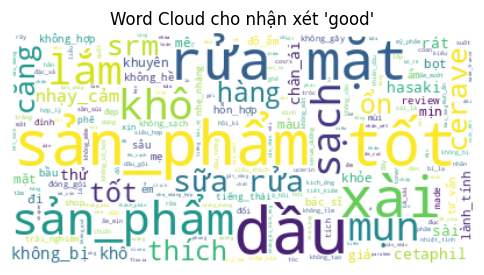

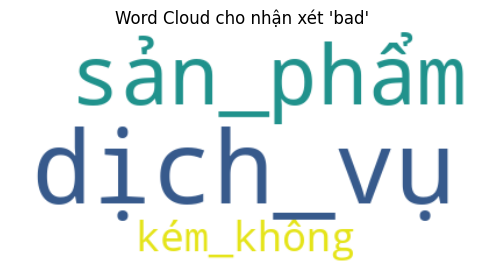

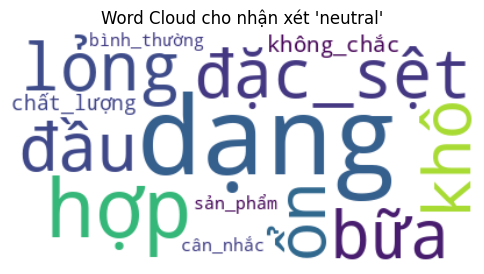


Từ khóa chính liên quan:
[('cerave', 1), ('cetaphil', 1), ('căng', 1), ('dầu', 1), ('hàng', 1), ('khô', 1), ('không_bị', 1), ('lắm', 1), ('mặt', 1), ('mụn', 1), ('nhạy_cảm', 1), ('rửa', 1), ('srm', 1), ('sạch', 1), ('sản_phẩm', 1), ('sữa', 1), ('thích', 1), ('tốt', 1), ('xài', 1), ('ổn', 1)]


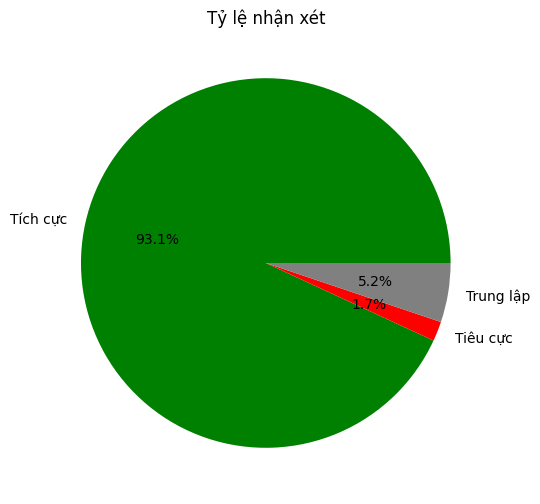

<ipython-input-33-90136113ed18>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_reviews['date'] = pd.to_datetime(product_reviews['ngay_binh_luan'], errors='coerce', format='%d/%m/%Y')


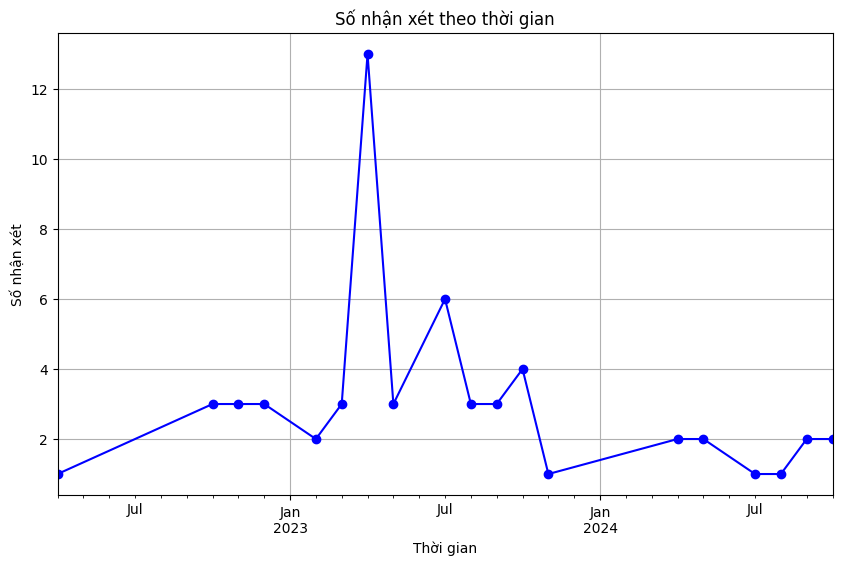

<ipython-input-33-90136113ed18>:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_reviews['date'] = pd.to_datetime(product_reviews['ngay_binh_luan'], errors='coerce', format='%d/%m/%Y')


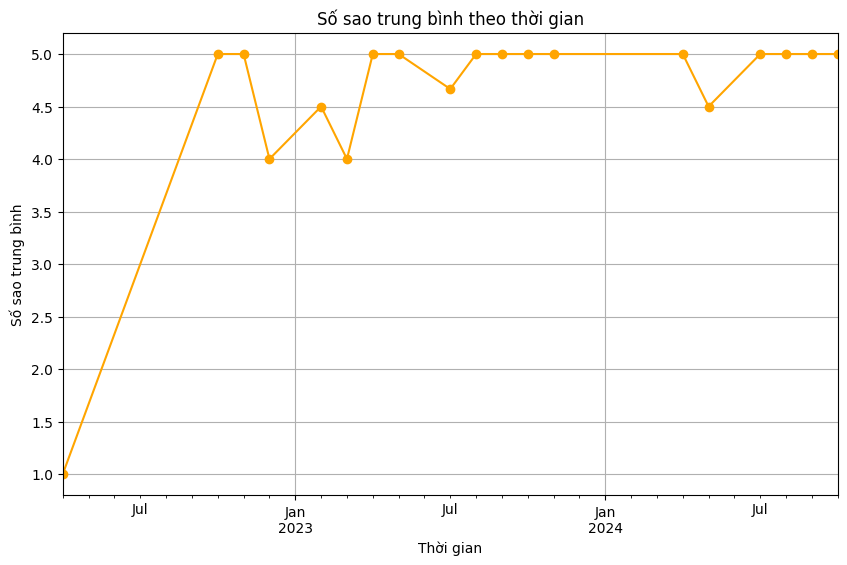

In [ ]:
analyze_product(df_san_pham, df_danh_gia, ma_san_pham=422208973)
